# Visualizing

Pandas plotting methods are good for histograms and lines when the index is the x axis. For categorical data / comparing distributions / most statistical use cases use seaborn.

In [1]:
import pandas as pd
import seaborn as sns

# Instruct the jupyter notebook to plot inline
# Don't forget to add this to
%matplotlib inline

In [2]:
df = pd.read_csv('data/dc-wikia-data-clean.csv')

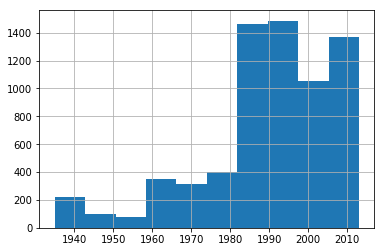

In [5]:
df['year'].hist()

## Let's recreate the plots from [the FiveThirtyEight report](https://fivethirtyeight.com/features/women-in-comic-books/)

Demo time!

In [9]:
df['female'] = (df['sex'] == 'Female')

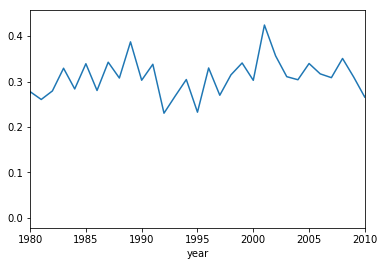

In [14]:
df.groupby('year').mean()['female'].plot(xlim=(1980, 2010))

In [20]:
cumsums = (
    df.groupby('year')
    .agg({'page_id': 'count', 'female': 'sum'})
    .rename(columns={'page_id': 'count'})
    .cumsum()
)

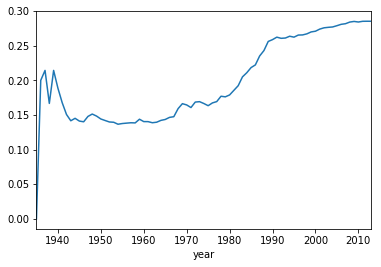

In [24]:
(cumsums['female'] / cumsums['count']).plot()

## *Exercise*

Plot the total number of good and bad characters over time. Are there more good or bad guys in DC universe today? When was the transition (approximately)?

## Some seaborn

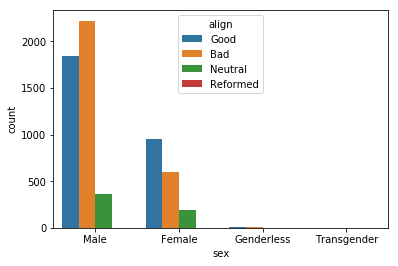

In [25]:
sns.countplot(x='sex', hue='align', data=df)

## *Semi exercise*

Go check the excelent [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)!